In [1]:
from urllib import request

url = "https://www.gutenberg.org/files/17989/17989-0.txt"
response = request.urlopen(url)
raw = response.read().decode("utf8")

dumas = raw.split(
    "*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[1].split(
    "*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[
    0
]

import re


def clean_text(text):
    text = text.lower()  # mettre les mots en minuscule
    text = " ".join(text.split())
    return text


dumas = clean_text(dumas)

dumas[10000:10500]

" mes yeux. --vous avez donc vu l'empereur aussi? --il est entré chez le maréchal pendant que j'y étais. --et vous lui avez parlé? --c'est-à-dire que c'est lui qui m'a parlé, monsieur, dit dantès en souriant. --et que vous a-t-il dit? --il m'a fait des questions sur le bâtiment, sur l'époque de son départ pour marseille, sur la route qu'il avait suivie et sur la cargaison qu'il portait. je crois que s'il eût été vide, et que j'en eusse été le maître, son intention eût été de l'acheter; mais je lu"

In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import wordcloud
import numpy as np
import io
import requests
import PIL
import matplotlib.pyplot as plt

img = "https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/book.png"
book_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))


def make_wordcloud(corpus):
    wc = wordcloud.WordCloud(
        background_color="white",
        max_words=2000,
        mask=book_mask,
        contour_width=3,
        contour_color="steelblue",
    )
    wc.generate(corpus)
    return wc


wordcloud_dumas = make_wordcloud(dumas)

(-0.5, 1429.5, 783.5, -0.5)

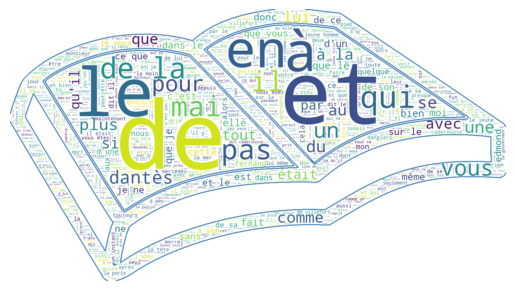

In [4]:
plt.imshow(wordcloud_dumas, interpolation="bilinear")
plt.axis("off")

In [5]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
import nltk

words = nltk.word_tokenize(dumas, language="french")
words[1030:1050]

['que',
 'voulez-vous',
 ',',
 'monsieur',
 'edmond',
 ',',
 'reprit',
 "l'armateur",
 'qui',
 'paraissait',
 'se',
 'consoler',
 'de',
 'plus',
 'en',
 'plus',
 ',',
 'nous',
 'sommes',
 'tous']

In [7]:
words = [word for word in words if word.isalpha()]
words[1030:1050]

['assez',
 'sombre',
 'obséquieux',
 'envers',
 'ses',
 'supérieurs',
 'insolent',
 'envers',
 'ses',
 'subordonnés',
 'aussi',
 'outre',
 'son',
 'titre',
 'comptable',
 'qui',
 'est',
 'toujours',
 'un',
 'motif']

In [8]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords

print(stopwords.words("french"))

stop_words = set(stopwords.words("french"))


words = [w for w in words if not w in stop_words]
print(words[1030:1050])

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

(-0.5, 1429.5, 783.5, -0.5)

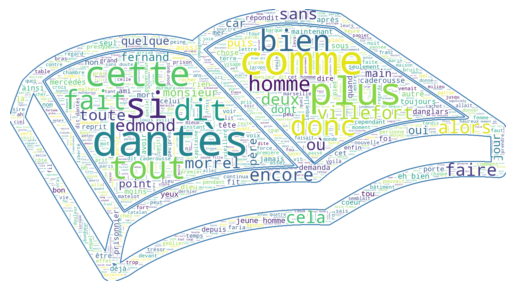

In [11]:
wc = make_wordcloud(" ".join(words))

fig = plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [12]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language="french")

stemmed = [stemmer.stem(word) for word in words]
print(stemmed[1030:1050])

['celui', 'dantes', 'a', 'dépos', 'pass', 'comment', 'paquet', 'dépos', 'danglar', 'roug', 'pass', 'dev', 'port', 'capitain', 'entrouvert', 'vu', 'remettr', 'paquet', 'cet', 'lettr']


In [15]:
pip install deplacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [20]:

!python -m spacy download fr_core_news_sm
import spacy
import spacy
from spacy import displacy

nlp=spacy.load("fr_core_news_sm")
doc = nlp(dumas[15000:17000])
displacy.render(doc, style="ent", jupyter=True)

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     --------------------------------------- 0.0/16.3 MB 435.7 kB/s eta 0:00:38
     --------------------------------------- 0.0/16.3 MB 435.7 kB/s eta 0:00:38
      --------------------------------------- 0.3/16.3 MB 2.0 MB/s eta 0:00:09
     - -------------------------------------- 0.6/16.3 MB 3.1 MB/s eta 0:00:06
     -- ------------------------------------- 0.9/16.3 MB 3.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.3/16.3 MB 4.3 MB/s eta 0:00:04
     ---- ----------------------------------- 1.9/16.3 MB 5.6 MB/s eta 0:00:03
     ----- ---------------------------------- 2.2/16.3 MB 5.7 MB/s eta 0:00:03
     ------ --------------------------------- 2.6/16.3 MB 6.1 MB/s eta 0:00:03
     ------- -------------------------------- 2.9/16.3 MB 6.0 MB/